This notebook runs logistic regression as shown in class. I just tried running it with the other targets.

#Import

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
log_reg.fit(X,y)

LogisticRegression()

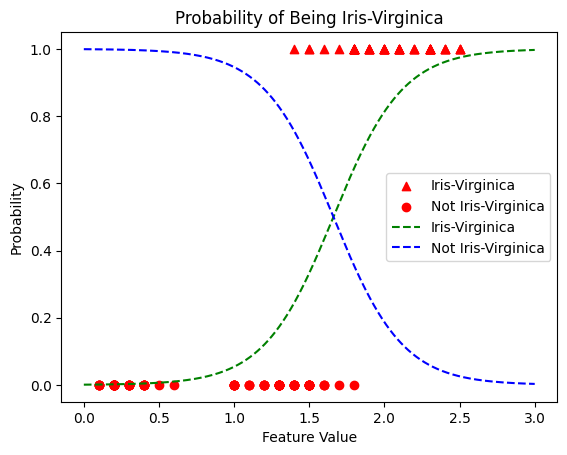

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0,3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.scatter(X[y == 1], y[y == 1], color='red', label='Iris-Virginica', marker='^')  # Triangle marker for Iris-Virginica
plt.scatter(X[y == 0], y[y == 0], color='red', label='Not Iris-Virginica', marker='o')  # Circle marker for Not Iris-Virginica
plt.plot(X_new, y_proba[:,1], "g--", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")
# Add axis labels and a title
plt.xlabel("Feature Value")
plt.ylabel("Probability")
plt.title("Probability of Being Iris-Virginica")
# Add a legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Probability of Being Iris-Virginica')

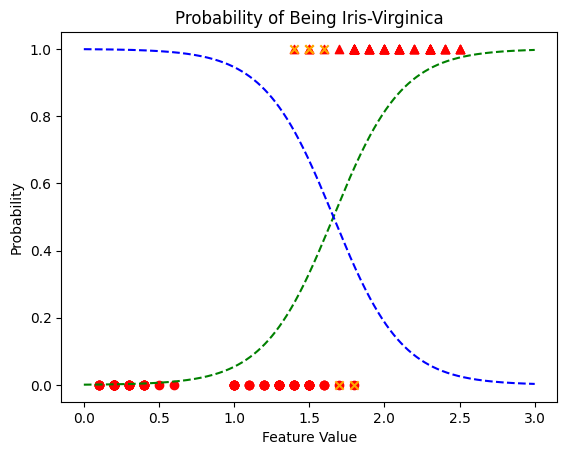

In [ ]:
# Plot the probabilities
plt.plot(X_new, y_proba[:, 1], "g--", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# Plot correctly classified points with individual markers
plt.scatter(X[y == 1], y[y == 1], color='red', label='Iris-Virginica (Correct)', marker='^')  # Triangle marker for correctly classified Iris-Virginica
plt.scatter(X[y == 0], y[y == 0], color='red', label='Not Iris-Virginica (Correct)', marker='o')  # Circle marker for correctly classified Not Iris-Virginica
# Find misclassified points
y_pred = log_reg.predict(X)  # Predicted class labels
misclassified = (y != y_pred)  # Boolean array indicating misclassified points
# Plot misclassified points with a different marker
plt.scatter(X[misclassified], y[misclassified], color='orange', label='Misclassified', marker='x')
# Add axis labels and a title
plt.xlabel("Feature Value")
plt.ylabel("Probability")
plt.title("Probability of Being Iris-Virginica")

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#Logistic Regression on the Virginica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = iris.data  # Features
y = (iris.target == 2).astype(int)  # Target variable: 1 for Iris-Virginica, 0 for other classes
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Predict the target labels on the testing set
y_pred = log_reg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#Try logistic regression on one of columns

#Logistic Regression on the versicolor

In [ ]:
X = iris.data  # Features
y = (iris.target == 1).astype(int)  # Target variable: 1 for Iris-versicolor, 0 for other classes
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Predict the target labels on the testing set
y_pred = log_reg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.62      0.45      0.53        11

    accuracy                           0.70        30
   macro avg       0.68      0.65      0.65        30
weighted avg       0.69      0.70      0.69        30




#Logistic Regression on the setosa

In [ ]:
X = iris.data  # Features
y = (iris.target == 0).astype(int)  # Target variable: 1 for Iris-setosa, 0 for other classes
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Predict the target labels on the testing set
y_pred = log_reg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Iris-Setosa is known to be the distinct one, while the other two varieties overlap. So it does make sense that the accuracy is 100%.

petal length vs width gives better divide between 2 sorcies